<a href="https://colab.research.google.com/github/JisungPark0319/education/blob/main/lab_ml/ml04_linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [6]:
iris['feature_names'] # DataFrame의 컬럼 이름으로 사용할 수 있는 배열.

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris['target_names'] # DataFrame의 카테고리형 변수의 클래스.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
X, y = iris['data'], iris['target']
X.shape, y.shape

((150, 4), (150,))

In [10]:
type(X)

numpy.ndarray

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* 선형 대수(Linear Algebra): 벡터 스페이스(Vector Space)를 다루는 수학의 한 분야

In [16]:
X[0] #> (수학) 4차원 벡터 -> (Python) 1d array

array([5.1, 3.5, 1.4, 0.2])

In [17]:
X[:5] # 여러개의 붓꽃 샘플(데이터 프레임) -> (수학) 행렬(Matrix) -> (Python) 2d-array

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

* 벡터의 크기(norm): 원점에서 벡터까지 거리


In [59]:
def vector_norm(v):
  """v = [v_1, v_2, ..., v_n] 일 때,
  norm = sqrt(sum_i[v_i ** 2])를 계산해서 리턴."""
  norm = np.sqrt(np.sum(v**2))
  return norm

In [66]:
vector_norm(X[:2])

8.675828490697588

In [65]:
np.linalg.norm(X[:2])

8.675828490697588

* 단위 벡터(unit vector): 크기(norm)가 1인 벡터. v / ||v||

In [67]:
v = np.array([1,1])
v

array([1, 1])

In [72]:
v_unit = v / np.linalg.norm(v)
v_unit

array([0.70710678, 0.70710678])

In [73]:
np.linalg.norm(v_unit)

0.9999999999999999

* 벡터들의 덧셈: 벡터의 원소별로(element-wise) 각각 덧셈을 수행.
* 벡터들의 덧셈이 가능하려면 벡터의 차원이 같아야 함(벡터의 원소의 개수가 같아야함)
* numpy array + 연산

In [75]:
u = np.array([1,5])
v = np.array([2,3])
u + v

array([3, 8])

* 스칼라 곱(Scalar Multiplication): 벡터의 각 원소에 스칼라(scalar)를 곱해 주는 것.

In [77]:
1.5 * u

array([1.5, 7.5])

In [78]:
u * 1.5

array([1.5, 7.5])

* 벡터의 점곱, 내적(Dot Product, Inner Product)
* numpy.dot() 함수, numpy.ndarray.dot() 메서드, numpy의 @연산자



In [86]:
def vector_dot_product(u, v):
  """u = [u_1, u_2, ..., u_n], v = [v_1, v_2, ..., v_n] 일 때,
  u dot v = u_1 * v_1 + u_2 * v_2 + ... + u_n * v_n = sum_i[u_i * v_i]
  """
  return np.sum([ x*y for x, y in zip(u, v)])

In [87]:
vector_dot_product(u, v)  # 1*2, + 5*3

17

In [88]:
# numpy.dot() 함수
np.dot(u, v)

17

In [89]:
# numpy.ndarray.dot() 메서드
u.dot(v)

17

In [90]:
u @ v

17

In [91]:
M = np.array([
              [1, 2, 3],
              [4, 5, 6]
])
M

array([[1, 2, 3],
       [4, 5, 6]])

In [92]:
M.shape # (row 개수, column 개수)

(2, 3)

* 행렬의 인덱스 M[i, j]
* (n, m) 모양(shape)의 2d-array에서 인덱스: 0 <= i < n, 0 <= j < m

In [94]:
# 행렬에서 원소 1개 선택
M[1, 2] #> 6

6

In [96]:
# 행렬에서 row(vector) 선택
M[1]

array([4, 5, 6])

In [97]:
# 행렬에서 column (vector) 선택
M[:, 1]

array([2, 5])

* numpy ndarray 객체는 행벡터(row vector), 열벡터(column vecotr)를 구분하지 않고, 1d-array로만 표시.
* scikit-learn 패키지를 사용할 때, 때로는, 행벡터를 행의 개수가 1개인 2d-array로 만들고, 열벡터는 열의 개수가 1개인 2d-array로 만들어야 되는 경우가 있음.

In [99]:
M[1:2, :] # 1 <= i < 2, 0 <= j < end
#> row vector 2d-array

array([[4, 5, 6]])

In [102]:
M[:, 1:2] # 0 <= i < end, 1 <= j < 2
#> column vector 2d-array

array([[2],
       [5]])

* 정사각행렬(square matrix): 행(row)와 열(column)의 개수가 같은 행렬
* 대각행렬(diagonal matrix): 대각선 성분(원소)이 아닌 원소들은 모두 0인 정사각 행렬.


In [103]:
np.diag([1,2,3]) #> np.diag(1d-array/1d-list): 대각행렬 생성

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [104]:
np.diag([[1,2,3,],
         [4,5,6,],
         [7,8,9,]])
# np.diag(2d-array/2d-list): 대각선 성분들로 이루어진 1d-array 생성

array([1, 5, 9])

* 항등 행령(identity matrix): 대각선 성분이 모두 1인 정사각 행렬.

In [105]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

* 행렬의 덧셈: 같은 인덱스의 원소들끼리(element-wise) 덧셈.
* S[i. j] = A[i, j] + B[i, j]

In [109]:
A = np.arange(1, 7).reshape(2, 3)
A

array([[1, 2, 3],
       [4, 5, 6]])

In [110]:
B = np.arange(10, 70, 10).reshape(2,3)
B

array([[10, 20, 30],
       [40, 50, 60]])

In [111]:
A + B

array([[11, 22, 33],
       [44, 55, 66]])

* 행렬의 스칼라 곱(scalar multiplication): 스칼라(scalar)를 행렬의 각 원소에 곱하는 것.

In [112]:
A * 2

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [113]:
2 * A

array([[ 2,  4,  6],
       [ 8, 10, 12]])

* 행렬의 곱셈(Matrix Multiplication) - Dot Product(점곱), Inner Product(내적)
* 두 행렬 A와 B의 곱 AB: 행렬 A의 row vector와 행렬 B의 column vector의 내적들로 이루어짐.
* AB: 행렬 A의 열의 개수와 행렬 B의 행의 개수가 같아야함.
* 일반적으로, AB != BA
* numpy.dot() 함수, numpy.ndarray.dot() 메서드, numpy @ 연산자

In [115]:
A = np.arange(1, 7).reshape(2, 3)
A # (2, 3) 행렬

array([[1, 2, 3],
       [4, 5, 6]])

In [117]:
B = np.array([1, 2] * 3).reshape(3, 2)
B # (3, 2) 행렬

array([[1, 2],
       [1, 2],
       [1, 2]])

In [119]:
np.dot(A, B) # numpy.dot() 함수

array([[ 6, 12],
       [15, 30]])

In [121]:
A.dot(B) # numpy.ndarray.dot 메서드

array([[ 6, 12],
       [15, 30]])

In [123]:
A @ B # (2, 3) @ (3, 2) = (2, 2)

array([[ 6, 12],
       [15, 30]])

In [124]:
B @ A # (3, 2) @ (2, 3) = (3, 3)

array([[ 9, 12, 15],
       [ 9, 12, 15],
       [ 9, 12, 15]])

In [125]:
A # (2,3)

array([[1, 2, 3],
       [4, 5, 6]])

In [129]:
# A @ I
A @ np.eye(3, dtype=np.int) # (3,3) 항등 행렬

array([[1, 2, 3],
       [4, 5, 6]])

In [131]:
# I @ A
np.eye(2, dtype=np.int) @ A # (2, 2) 항등 행렬

array([[1, 2, 3],
       [4, 5, 6]])

* 전치 행렬(Transpose): 행과 열을 바꾼 행렬.

In [134]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [136]:
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [137]:
a = np.array([1,2,3])
a

array([1, 2, 3])

In [138]:
a.T #> 1-d array
# 1d-array의 Transpose는 컬럼이 1개인 2d-array가 되지 않는다!

array([1, 2, 3])

* numpy 1d-array를 2d-array로 변환 => row vector <-- (transpose) --> column

In [141]:
A = np.array([a])
A #> 행(row)이 1개인 2d-array

array([[1, 2, 3]])

In [140]:
A.T

array([[1],
       [2],
       [3]])

In [143]:
a[np.newaxis, :] # 1d-array -> row vector

array([[1, 2, 3]])

In [144]:
a[:, np.newaxis] # 1d-aray -> column vector

array([[1],
       [2],
       [3]])

* 역행렬(Inverse Matrix): 행렬 A가 정사각행렬일 때 `A @ X =  X @ A = I`을 만족하는 정사각행렬 X를 행렬 A의 역행렬이라고 함.
* 모든 정사각행렬이 역행렬을 갖지는 않음.
* numpy.linalg.inv() 함수

In [146]:
A = np.arange(1, 5).reshape(2, 2)
A

array([[1, 2],
       [3, 4]])

In [148]:
A_inv = np.linalg.inv(A)
A_inv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [149]:
A @ A_inv

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

In [150]:
A_inv @ A

array([[1.00000000e+00, 0.00000000e+00],
       [1.11022302e-16, 1.00000000e+00]])

In [154]:
A = np.array([[1,2,3],
              [4,5,6,],
              [7,8,0]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 0]])

In [155]:
np.linalg.inv(A)

array([[-1.77777778,  0.88888889, -0.11111111],
       [ 1.55555556, -0.77777778,  0.22222222],
       [-0.11111111,  0.22222222, -0.11111111]])

* 행렬의 Determinant: det(A), |A|
* numpy.linalg.det() 함수

In [158]:
A = np.array([[1,2],
              [3,4]])
A

array([[1, 2],
       [3, 4]])

In [161]:
np.linalg.det(A) # det = 1 * 4 - 2 * 3

-2.0000000000000004

In [162]:
A = np.array([[1,2],
              [2,4]])
A

array([[1, 2],
       [2, 4]])

In [163]:
np.linalg.det(A) # det=0이면, 역행렬이 존재하지 않음 -> Singular matrix

0.0

In [164]:
A = np.array([[1,2,3,],
              [4,5,6],
              [7,8,9]])
np.linalg.det(A)

0.0

* 선형 회귀(Linear Regression)에서 선형 대수 응용.

In [165]:
x = np.array([1, 2, 3]).reshape((3,1))
x

array([[1],
       [2],
       [3]])

In [166]:
y = np.array([3, 5, 7]).reshape((3,1))
y

array([[3],
       [5],
       [7]])

```
3 = a * 1 + b
5 = a * 2 + b
7 = a * 3 + b
```
목적: a와 b를 찾는다.

In [170]:
w = np.array([2, 1]).reshape(2,1)
w

array([[2],
       [1]])

In [171]:
X = np.c_[x, np.ones(shape=(3,1))]
X

array([[1., 1.],
       [2., 1.],
       [3., 1.]])

In [172]:
X @ w

array([[3.],
       [5.],
       [7.]])

In [184]:
w2 = np.linalg.inv(X.T @ X) @ X.T @ y # 정규 방정식(normal equation)
w2

array([[2.],
       [1.]])

In [196]:
x = 3 * np.random.rand(100, 1) # (100 ,1) column vector
y = 4 + 3 * x + np.random.randn(100, 1) # (100 ,1) column vector

1. y ~ x scatter plot을 그리세요
2. 데이터 x, y를 y = theta0 + theta1*x 선형 회귀 방정식으로 설명하려고 할 때, theta0와 theta1을 정규 방정식으로 찾으시에요.
3. scatter plot에 선형 회귀 방정식을 1번의 직선을 추가해서 그리세요.

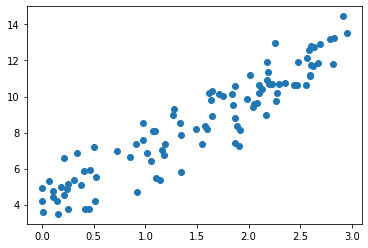

In [197]:
plt.scatter(x=x, y=y)
plt.show()

In [209]:
X = np.c_[x, np.ones((100,1))]
X.shape

(100, 2)

In [221]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
w.shape

(2, 1)

In [223]:
pred_y = X @ w
pred_y.shape

(100, 1)

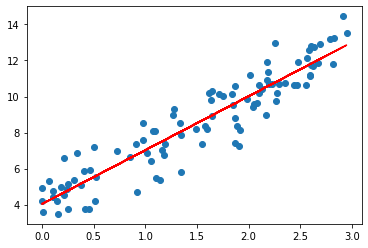

In [231]:
plt.scatter(x=x, y=y)
plt.plot(x, pred_y, color='red')
plt.show()